# **Zero-Shot Image Classification**

In [1]:
!pip install transformers
!pip install torch

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [4]:
from transformers import CLIPModel, CLIPProcessor, AutoProcessor
import torch
from PIL import Image
import requests

In [5]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [6]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [7]:
url = 'https://www.akc.org/wp-content/uploads/2018/05/Three-Australian-Shepherd-puppies-sitting-in-a-field.jpg'

In [8]:
image = Image.open(requests.get(url, url, stream=True).raw).convert('RGB')

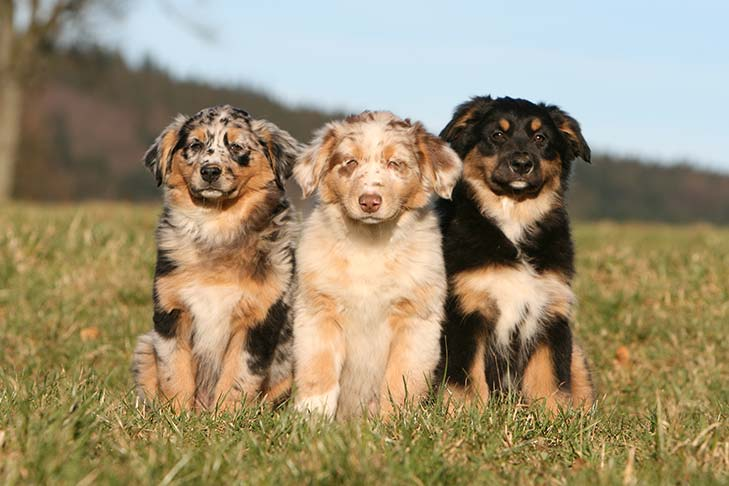

In [9]:
image

In [18]:
labels = ['photo of elephents', 'photo of friends', 'photo of cats']

In [19]:
input = processor(text=labels, images=image, return_tensors='pt', padding=True)

In [20]:
outputs = model(**input)

In [21]:
outputs.logits_per_image

tensor([[15.6049, 20.2416, 19.9227]], grad_fn=<TBackward0>)

In [22]:
probs = outputs.logits_per_image.softmax(dim=1)[0]

In [23]:
probs

tensor([0.0056, 0.5758, 0.4186], grad_fn=<SelectBackward0>)

In [24]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: photo of elephents - probability of 0.0056
label: photo of friends - probability of 0.5758
label: photo of cats - probability of 0.4186
